# Brief  Explanation



**Purpose**:
The Breast Cancer Wisconsin dataset is commonly used in machine learning and data analysis for classification tasks. The primary purpose of this dataset is to predict whether a breast cancer tumor is benign or malignant based on various features derived from the analysis of breast cancer biopsies. This dataset serves as a valuable resource for exploring and testing different machine learning algorithms for cancer diagnosis.

**Features**:
The dataset includes a set of features that are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. These features are numerical and represent various characteristics of cell nuclei present in the image. The features can be broadly categorized into the following groups:

1. **Ten real-valued features computed for each cell nucleus:**
   - Radius (mean of distances from center to points on the perimeter)
   - Texture (standard deviation of gray-scale values)
   - Perimeter
   - Area
   - Smoothness (local variation in radius lengths)
   - Compactness (perimeter^2 / area - 1.0)
   - Concavity (severity of concave portions of the contour)
   - Concave points (number of concave portions of the contour)
   - Symmetry
   - Fractal dimension ("coastline approximation" - 1)

2. **Class label:**
   - The class label is binary, indicating whether the tumor is benign (B) or malignant (M).

**Size**:
The dataset typically consists of a few hundred instances, each representing a biopsy sample. The exact size may vary, but it's a relatively small dataset, making it suitable for experimentation and learning purposes. The small size also allows for quicker training and testing of machine learning models.

Understanding the characteristics of the dataset is crucial for performing meaningful analyses and comparisons of dimensionality reduction methods such as PCA and UMAP in the context of breast cancer diagnosis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import itertools
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install umap-learn
import umap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 90.9/90.9 kB 916.1 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.8/55.8 kB 3.2 MB/s eta 0:00:00
  Created wheel for umap-learn: filename=umap_learn-0.5.5-py3-none-any.whl size=86832 sha256=359e8e7872f2fa739539bc2d5725b28446365901eda49f5a11731e3cc95de9bf
  Stored in directory: /root/.cache/pip/wheels/3a/70/07/428d2b58660a1a3b431db59b806a10da736612ebbc66c1bcc5
Successfully built umap-learn


# Load dataset

In [3]:
from sklearn.datasets import load_breast_cancer
cancer = load_breast_cancer()
features = cancer.feature_names

data = np.c_[cancer.data, cancer.target]
columns = np.append(cancer.feature_names, ["target"])
data_df = pd.DataFrame(data, columns=columns)

X = data_df[data_df.columns[:-1]]
y = data_df.target

data_df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0.0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0.0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0.0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0.0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0.0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0.0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0.0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0.0


In the context of medical diagnoses, particularly in relation to tumors, **'benign'** is the term that refers to a condition that is not harmful in effect. In other words, a benign tumor is not cancerous and does not spread to other parts of the body.

On the other hand, **'malignant'** is the term used to describe a severe and progressively worsening disease. Specifically, a malignant tumor is cancerous, capable of spreading to other parts of the body, and can be life-threatening.

So, between 'malignant' and 'benign', **'benign'** is the term associated with a healthier condition. However, any medical condition should be evaluated by a healthcare professional for an accurate diagnosis and treatment

In the load_breast_cancer dataset from sklearn.datasets, the target variable represents the diagnosis of breast tissues, where 0 stands for malignant (cancerous) and 1 stands for benign (not cancerous).

So, in this context, 1 represents the healthy condition (benign), while 0 represents the unhealthy condition (malignant).

In [4]:
data_df.describe().T

,count,mean,std,min,25%,50%,75%,max
mean radius,569.0,14.127292,3.524049,6.981000,11.700000,13.370000,15.780000,28.11000
mean texture,569.0,19.289649,4.301036,9.710000,16.170000,18.840000,21.800000,39.28000
mean perimeter,569.0,91.969033,24.298981,43.790000,75.170000,86.240000,104.100000,188.50000
mean area,569.0,654.889104,351.914129,143.500000,420.300000,551.100000,782.700000,2501.00000
mean smoothness,569.0,0.096360,0.014064,0.052630,0.086370,0.095870,0.105300,0.16340
mean compactness,569.0,0.104341,0.052813,0.019380,0.064920,0.092630,0.130400,0.34540
mean concavity,569.0,0.088799,0.079720,0.000000,0.029560,0.061540,0.130700,0.42680
mean concave points,569.0,0.048919,0.038803,0.000000,0.020310,0.033500,0.074000,0.20120
mean symmetry,569.0,0.181162,0.027414,0.106000,0.161900,0.179200,0.195700,0.30400
mean fractal dimension,569.0,0.062798,0.007060,0.049960,0.057700,0.061540,0.066120,0.09744


Here's a breakdown of what you would typically see in the output:

- **Count:** The number of non-null values in each column, indicating the size of the dataset.
- **Mean:** The average value for each feature.
- **Std:** The standard deviation, a measure of the amount of variation or dispersion of a set of values.
- **Min:** The minimum value observed in each feature.
- **25%:** The 25th percentile, also known as the first quartile.
- **50% (median):** The median or 50th percentile, which represents the middle value of the dataset.
- **75%:** The 75th percentile, also known as the third quartile.
- **Max:** The maximum value observed in each feature.

By transposing the result, you get a table where each row corresponds to a feature, and each column provides the descriptive statistics for that feature. This can be helpful for a quick overview of the distribution and central tendency of the dataset's features.

# Exploratory Data Analysis (EDA)

The Exploratory Data Analysis (EDA) section aims to gain insights into the Breast Cancer Wisconsin dataset through visualizations. The section includes three main plots:

## 1. Diagnoses Distribution

### Number of Diagnoses in Two Groups

**Description:**
In this plot, we visualize the distribution of diagnoses in two groups: benign (B) and malignant (M). The countplot provides a clear representation of the number of instances belonging to each diagnosis category.

**Reason:**
Understanding the distribution of diagnoses is crucial for assessing the balance of the dataset. An imbalanced dataset might influence the performance of machine learning models, especially in a binary classification task like breast cancer diagnosis.

## 2. Correlation Heatmap

**Description:**
The correlation heatmap illustrates the pairwise correlation coefficients between different features in the dataset. Each cell in the heatmap represents the correlation strength and direction (positive or negative) between two features.

**Reason:**
Examining the correlation between features helps identify potential relationships and dependencies within the dataset. This information is valuable for feature selection and understanding which features might contribute more significantly to the classification task.

## 3. Diagnosis vs. Features

### Violinplot

**Description:**
A set of violinplots is created to visually compare the distribution of selected features between benign and malignant diagnoses. Each plot shows the distribution of a specific feature for both diagnosis categories.

**Reason:**
Violinplots allow us to observe the distribution, central tendency, and spread of selected features for different diagnoses. This aids in identifying potential discriminatory features and understanding the variations between benign and malignant tumors.

In summary, this EDA section aims to provide a comprehensive overview of the Breast Cancer Wisconsin dataset, starting with the distribution of diagnoses, exploring feature correlations, and delving into the detailed comparison of specific features across different diagnosis categories. These visualizations lay the groundwork for further analysis and model building in subsequent sections of the analysis.

**1. Number of Diagnoses in Two Groups**

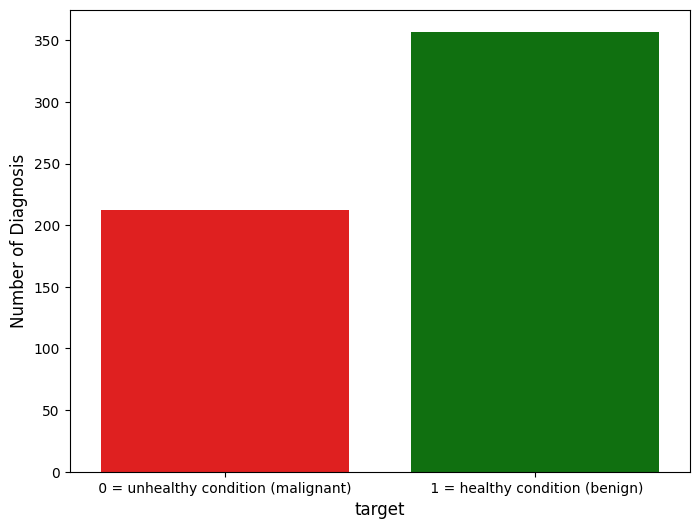

In [5]:
cnt_pro = data_df['target'].value_counts()
plt.figure(figsize=(8,6))
barplot = sns.barplot(x=cnt_pro.index, y=cnt_pro.values, palette=['red', 'green'])
plt.ylabel('Number of Diagnosis', fontsize=12)
plt.xlabel('target', fontsize=12)

# Set x-tick labels
barplot.set_xticklabels([' 0 = unhealthy condition (malignant) ' , ' 1 = healthy condition (benign)'])

plt.show()

This graph is likely used to visualize the distribution of diagnoses in the dataset, with a larger number of benign cases compared to malignant ones. It’s a common way to understand the balance of classes in a dataset before applying machine learning techniques.

**2. Correlation Heatmap**

<Axes: >

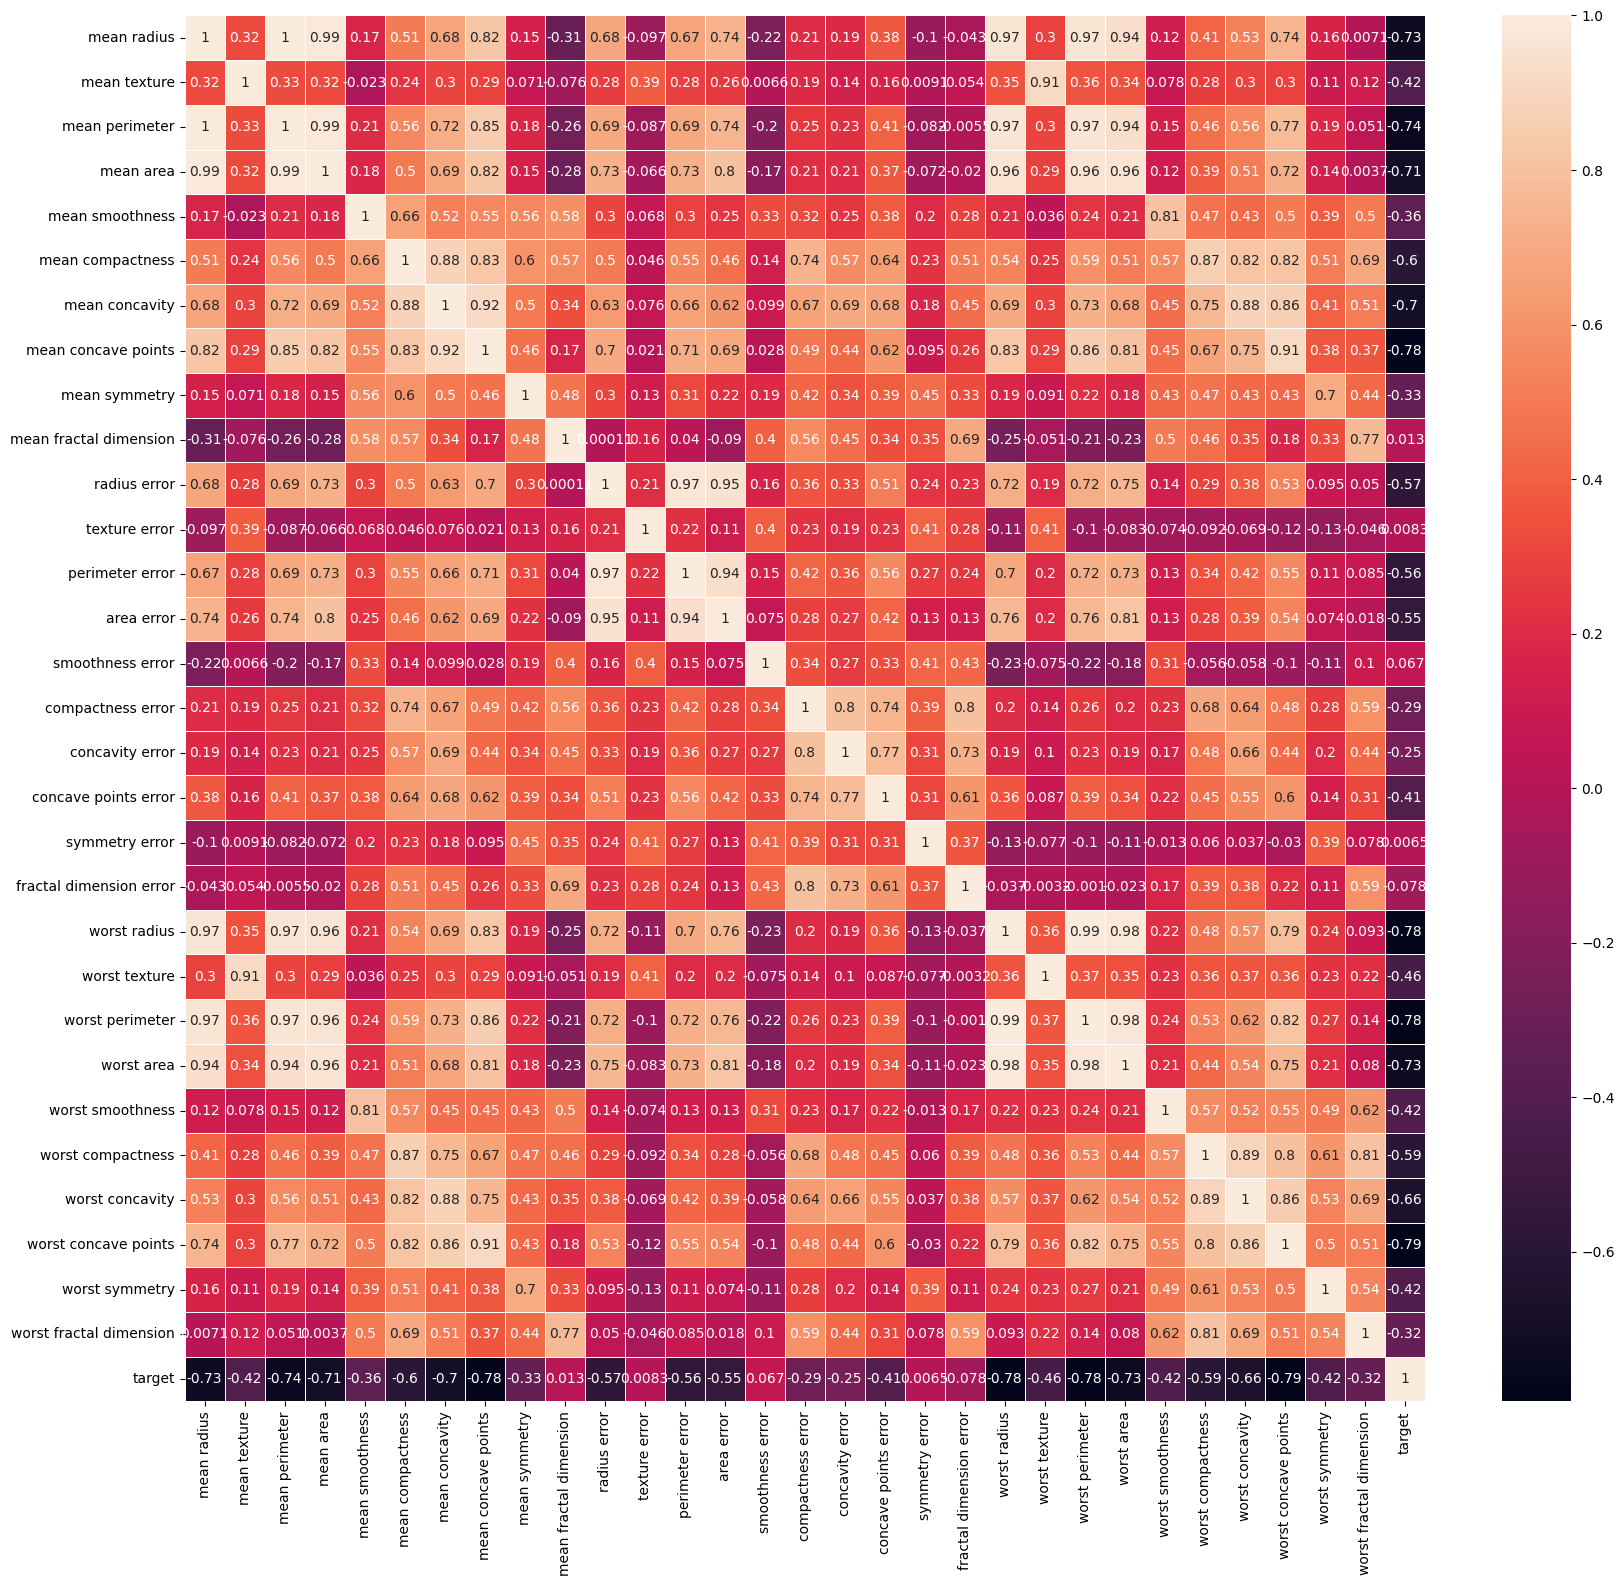

In [6]:
# heatmap
plt.figure(figsize=(20,18))
sns.heatmap(data_df.corr(), annot=True, linewidths=.5)

This heatmap is likely used to understand the relationships between different features and the target in the dataset, which can be crucial for feature selection in machine learning models.

- The heatmap is organized in a grid format where both rows and columns are labeled with feature names like "mean radius," "mean texture," "mean perimeter," etc.
- The color intensity and the numerical value within each cell represent the strength and direction of the correlation; darker red indicates stronger positive correlations, while darker purple indicates stronger negative correlations.
- There is a color scale on the right side of the heatmap ranging from -1 to 1 to help interpret the colors' meaning; -1 indicates perfect negative correlation, 0 no correlation, and 1 perfect positive correlation.
- Some cells have stronger correlations as indicated by their intense color (either red or purple) and are particularly important for understanding relationships among variables.



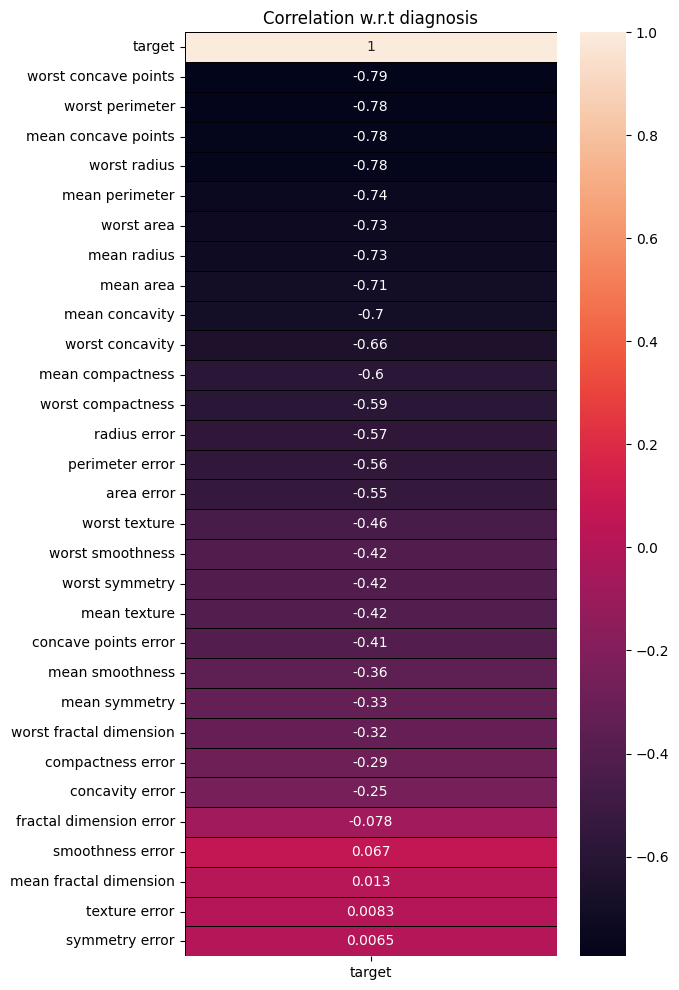

In [7]:
fig, ax = plt.subplots(figsize = (6,12))

# Compute correlations and sort by absolute values
corr = data_df.corrwith(data_df['target']).sort_values(key=abs, ascending=False).to_frame()
corr.columns = ['target']

sns.heatmap(corr, annot=True, linewidths=0.5, linecolor='black')
plt.title('Correlation w.r.t diagnosis')
plt.show()


This graph is likely used to understand the relationships between different features and the target in the dataset. Here's a detailed description:

- The correlations range from -1 to 1, with negative values indicating a negative correlation and positive values indicating a positive correlation.
- A color gradient from dark purple to orange represents the strength and direction of each feature's correlation with the target; dark purple indicates strong negative correlations, light purple indicates weak negative correlations, white indicates no significant correlations, and orange indicates positive correlations.
- Features like "worst concave points," "worst perimeter," "mean concave points," and "worst radius" have strong negative correlations (around -0.78 or higher) with the target.
- Features like “symmetry error,” “texture error,” “mean fractal dimension,” etc., have very weak or no significant correlations as indicated by their proximity to white on the color gradient.


**3. Diagnosis vs. Features**


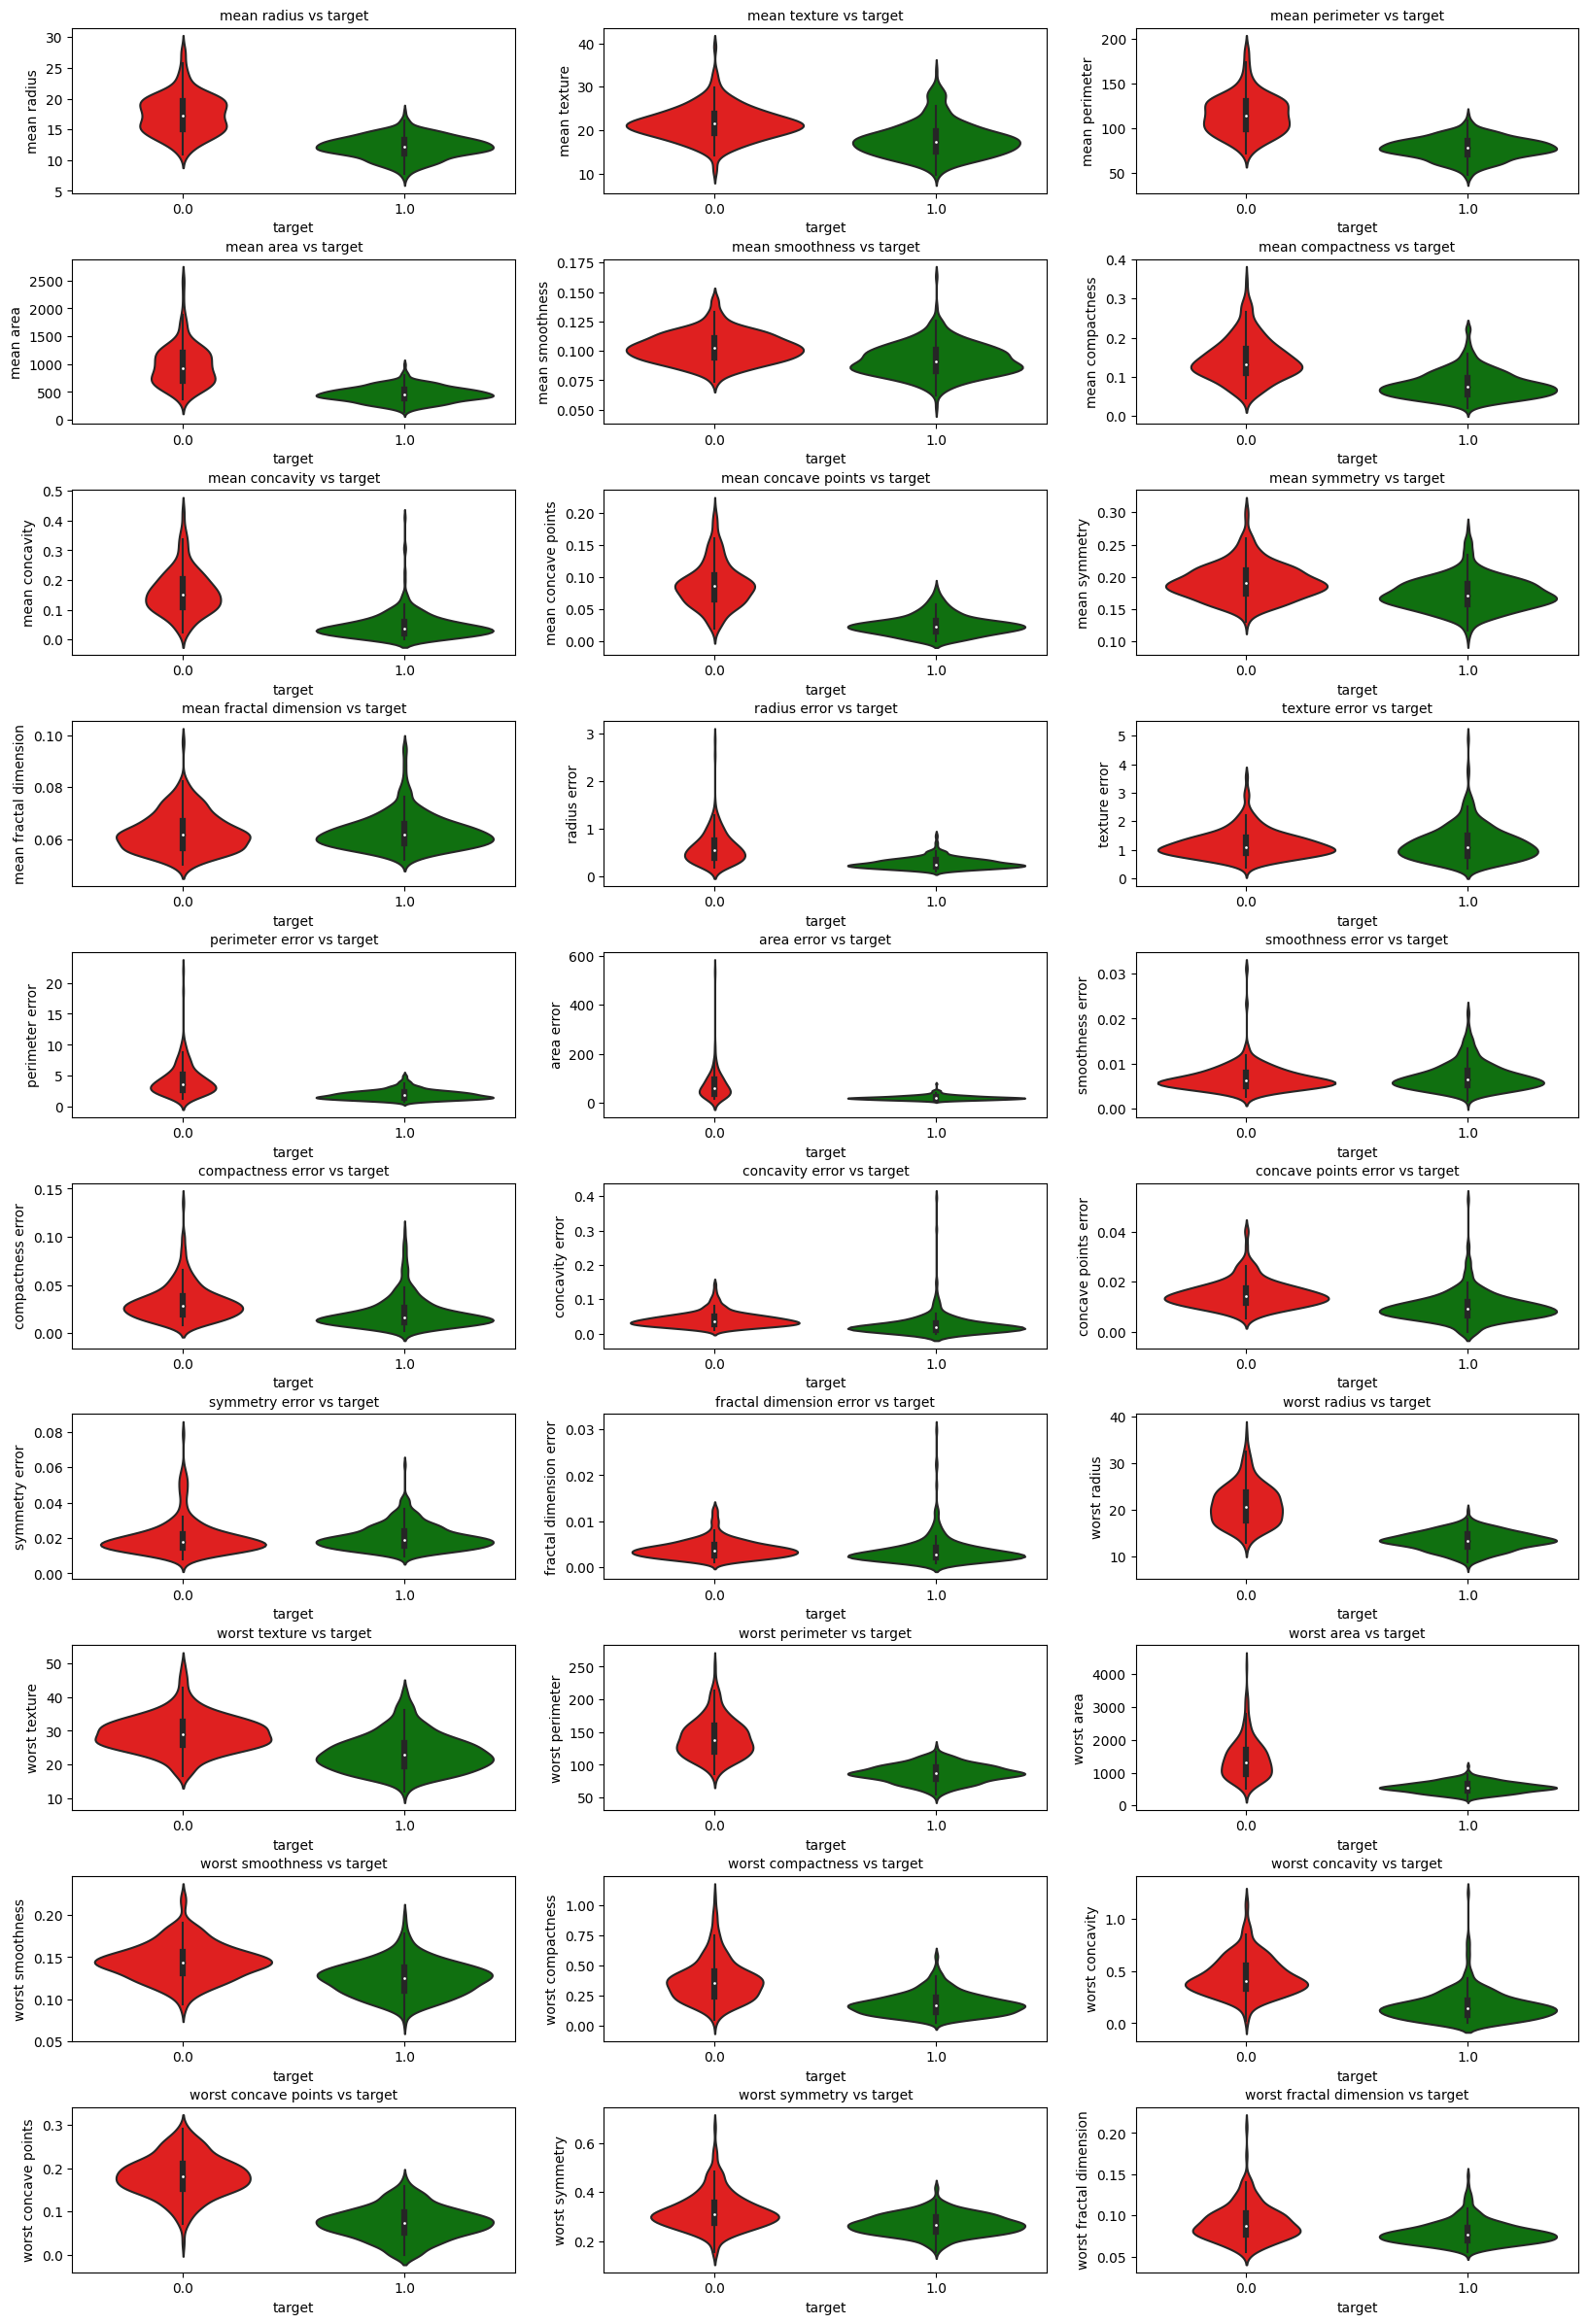

In [8]:
# Define the colors
colors = ['red', 'green']

fig, ax = plt.subplots(nrows=10, ncols=3, figsize=(20, 30))
plt.subplots_adjust(wspace=0.2, hspace=0.4)

for i in range(30):
    plt.subplot(10, 3, i+1)
    ax = sns.violinplot(x='target', y=features[i], data=data_df, palette=colors)
    title = features[i] + ' vs target'
    plt.title(title, fontsize=10)

plt.show()


Violin plots are used to visualize the distribution of numerical data of different variables. They are similar to box plots, but also show the probability density of the data at different values. Here's a detailed description:

- The image consists of multiple pairs of red and green violin plots.
- Each pair represents a different feature from the breast cancer dataset.
- The features include radius, texture, perimeter, area, smoothness, compactness, concavity, concave points, symmetry, and fractal dimension in their mean, error and worst form.
- Red plots represent the distribution of these features for malignant tumors; green plots represent benign tumors.
- Each plot is labeled with the feature it represents and has numerical scales on both sides to indicate values' range.



# Preprocessing and Dimensionality Reduction

In the "Preprocessing and Dimensionality Reduction" section, the primary objective is to enhance the Breast Cancer Wisconsin dataset for subsequent analysis and modeling. The following steps are executed:

## Data Preprocessing

### Standard Scaling

The dataset undergoes standard scaling, a preprocessing technique that normalizes the features to a common scale. This step is essential to prevent features with larger scales from disproportionately influencing the performance of certain machine learning algorithms.

## Dimensionality Reduction

### Principal Component Analysis (PCA)

PCA is applied to the standardized dataset to reduce its dimensionality. PCA identifies a set of new variables (principal components) that capture the maximum variance in the original data. This reduction in dimensionality is valuable for simplifying the dataset while retaining its essential characteristics.

### Kernel Principal Component Analysis (Kernel PCA)

Kernel PCA is utilized to address non-linearity in the data. By applying kernel functions, this technique projects the data into a higher-dimensional space, enabling the capture of complex relationships that may not be linearly separable in the original feature space.

### Locally Linear Embedding (LLE)

LLE focuses on preserving the local relationships between data points. It aims to unfold the underlying manifold of the data by reconstructing each point as a linear combination of its neighbors. LLE is particularly useful when dealing with datasets exhibiting intricate local structures.

### Uniform Manifold Approximation and Projection (UMAP)

UMAP is a dimensionality reduction technique that emphasizes preserving both local and global structures in the data. It excels in capturing complex patterns and is often preferred for visualizing high-dimensional datasets in lower dimensions.

### Supervised UMAP

In addition to the unsupervised UMAP, a supervised variant is employed when considering labeled data. This approach takes advantage of the diagnostic information in the dataset, potentially leading to more meaningful separation of classes during dimensionality reduction.

## Results Comparison

The outcomes of each dimensionality reduction technique are then visualized and compared. By plotting the reduced-dimensional representations, the effectiveness of each method in capturing the inherent patterns and structures within the breast cancer dataset can be assessed. This comparison serves as a foundation for further analysis and model development.

**Standard Scalling**

it's important to clarify the correct order of operations when it comes to scaling and splitting the data.

**Note:** It is crucial to follow the correct order of operations when working with data preprocessing, specifically scaling and splitting. The correct sequence is to first split the data into training and testing sets and then apply any transformations such as scaling.

```markdown


Incorrect Order:
```python
# Incorrect Order: Scaling first and then splitting
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply StandardScaler to scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

Correct Order:
```python
# Correct Order: Splitting first and then scaling
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Apply StandardScaler to scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
```

Scaling the data before splitting can introduce data leakage, where information from the test set influences the scaling parameters, leading to over-optimistic performance estimates. Always ensure that the data is split into training and testing sets before any transformation is applied.

In [9]:
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=43)

# Apply StandardScaler to scale your features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

**Dimensionality Reduction**

In [10]:
from sklearn.decomposition import PCA, KernelPCA
from sklearn.manifold import LocallyLinearEmbedding

# PCA
pca = PCA(n_components=2, random_state=42)
X_train_PCA = pca.fit_transform(X_train_scaled)
X_test_PCA = pca.transform(X_test_scaled)

# LLE
lle_model = LocallyLinearEmbedding(n_components=2, random_state=42)
X_train_LLE = lle_model.fit_transform(X_train_scaled)
X_test_LLE = lle_model.transform(X_test_scaled)

# Kernel PCA
kpca_model = KernelPCA(n_components=2, kernel='rbf', random_state=42)
X_train_KPCA = kpca_model.fit_transform(X_train_scaled)
X_test_KPCA = kpca_model.transform(X_test_scaled)

# Assuming X is your high-dimensional data
UMAP_model = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_train_UMAP = UMAP_model.fit_transform(X_train_scaled)
X_test_UMAP = UMAP_model.transform(X_test_scaled)

# Assuming X is your high-dimensional data and y are your labels
UMAP_model_2 = umap.UMAP(n_neighbors=5, min_dist=0.3, n_components=2, random_state=42)
X_train_UMAP_supervised = UMAP_model_2.fit_transform(X_train_scaled, y=y_train)
X_test_UMAP_supervised = UMAP_model_2.transform(X_test_scaled)


This code snippet performs dimensionality reduction on high-dimensional data using different techniques:

1. **PCA (Principal Component Analysis):**
   - Reduces the data to 2 dimensions.
   - Applied to both training and testing sets after standard scaling.
  
2. **LLE (Locally Linear Embedding):**
   - Reduces the data to 2 dimensions.
   - Applied to both training and testing sets after standard scaling.

3. **Kernel PCA (Kernel Principal Component Analysis):**
   - Uses the radial basis function (RBF) kernel.
   - Reduces the data to 2 dimensions.
   - Applied to both training and testing sets after standard scaling.

4. **UMAP (Uniform Manifold Approximation and Projection):**
   - Unsupervised UMAP:
      - Reduces the data to 2 dimensions.
      - Applied to both training and testing sets after standard scaling.
   - Supervised UMAP:
      - Considers class labels during dimensionality reduction.
      - Assumes `X_train_scaled` is the high-dimensional training data and `y_train` are the labels.
      - Applied to both training and testing sets.

In summary, the code applies various dimensionality reduction techniques to transform high-dimensional data into 2D representations. These techniques include PCA, LLE, Kernel PCA, and both unsupervised and supervised versions of UMAP. The resulting reduced-dimensional representations are stored in separate variables for both training and testing sets.

In [11]:
import matplotlib.patches as mpatches

def plot_data(X_, y_, titles):
    # Define the colors
    colors = ['red' if label == 0 else 'green' for label in y_]

    # Create figure
    plt.figure(figsize=(16, 16))

    # Loop over each subplot
    for i in range(5):
        plt.subplot(5, 1, i+1)
        scatter = plt.scatter(X_[i][:, 0], X_[i][:, 1], c=colors, edgecolor='k')
        plt.title(titles[i])
        plt.gca().set_facecolor('lightgray')
        red_patch = mpatches.Patch(color='red', label='malignant')
        green_patch = mpatches.Patch(color='green', label='benign')
        plt.legend(handles=[red_patch, green_patch])

    plt.show()

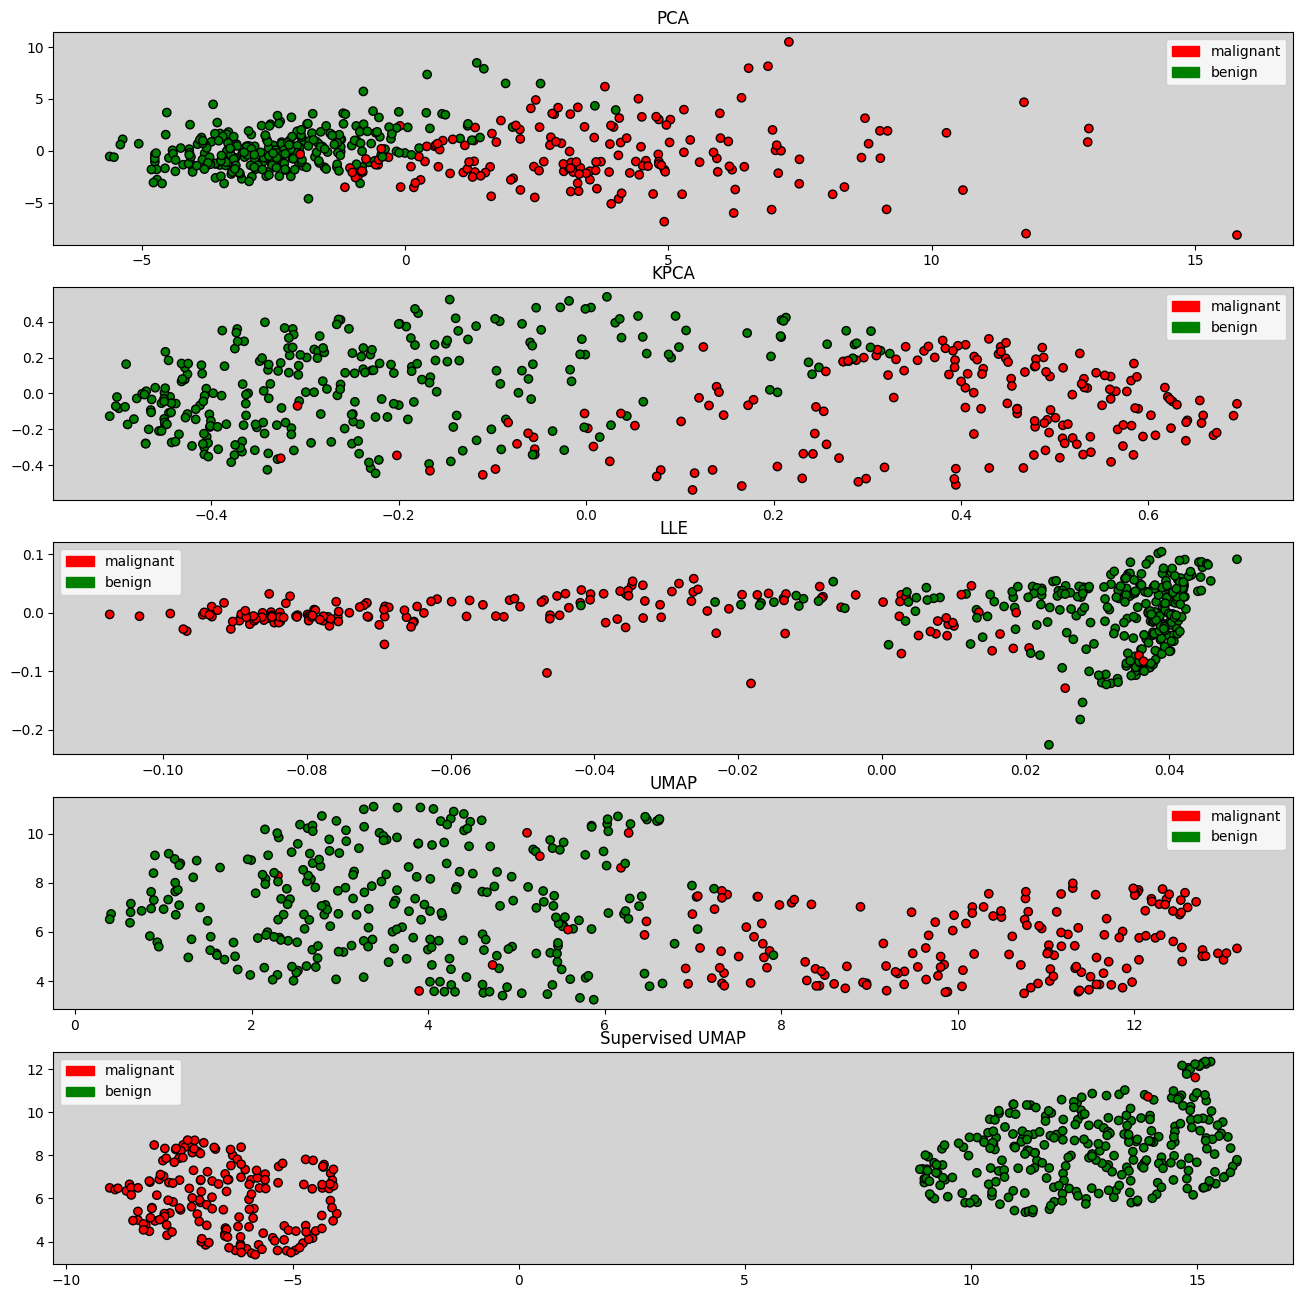

In [12]:
# Call the function
X_train_list = [X_train_PCA, X_train_KPCA, X_train_LLE, X_train_UMAP, X_train_UMAP_supervised]
titles = ['PCA', 'KPCA', 'LLE', 'UMAP', 'Supervised UMAP']
plot_data(X_train_list, y_train, titles)

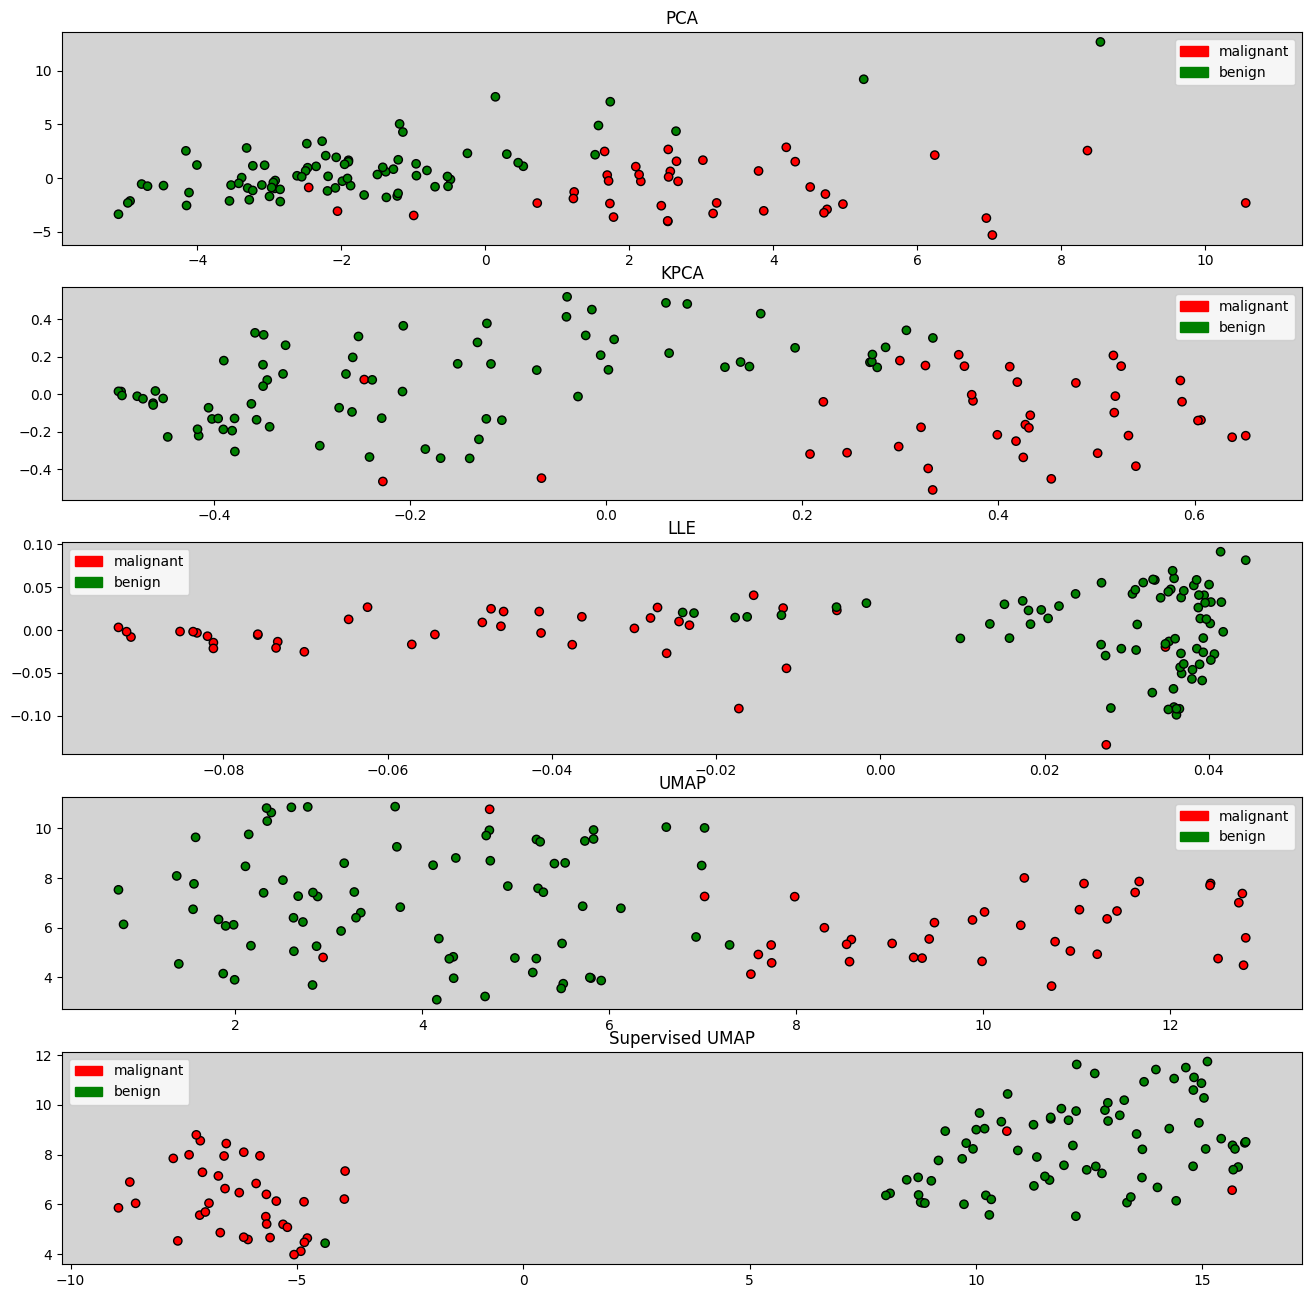

In [13]:
# Call the function
X_test_list = [X_test_PCA, X_test_KPCA, X_test_LLE, X_test_UMAP, X_test_UMAP_supervised]
titles = ['PCA', 'KPCA', 'LLE', 'UMAP', 'Supervised UMAP']
plot_data(X_test_list, y_test, titles)

The image you've shared consists of five scatter plots comparing different dimensionality reduction techniques: PCA, kPCA, LLE, UMAP, and Supervised UMAP. Here's a detailed description:

- Each plot is labeled with the name of the technique used.
- In each plot:
  - Green dots represent benign data points.
  - Red dots represent malignant data points.
- PCA and kPCA plots show a mix of red and green dots scattered across the plot area without clear separation between them.
- LLE shows some degree of separation but still has overlapping areas where red and green dots are mixed.
- UMAP shows a better separation between red and green dots compared to previous models but still has some overlap.
- Supervised UMAP shows a distinct separation between red (malignant) and green (benign) dots; they are clustered in two separate groups with no overlap.

Based on the degree of separation between the benign and malignant data points, the **Supervised UMAP** appears to be the most effective model among those presented. It shows a clear distinction between the two classes, which is crucial for a good classification model. However, the final choice of model also depends on other factors such as the computational cost, interpretability, and the specific requirements of your project.

# Classification
In the classification section, the provided code assesses the performance of a Decision Tree classifier on both the original and reduced-dimensional datasets using various dimensionality reduction methods. Here's a general overview:

1. **Classifier Setup:**
   - A Decision Tree classifier is instantiated with specified parameters (`max_depth=3`, `min_samples_leaf=12`).
   - The classifier is trained on the original training set (`X_train` and `y_train`).

2. **Model Evaluation:**
   - The accuracy of the Decision Tree classifier is measured on both the original training set and the original test set. This provides an understanding of how well the model performs on the data it was trained on and on new, unseen data.

3. **Prediction and Confusion Matrix:**
   - The trained classifier is used to predict labels for the original test set (`X_test`).
   - A confusion matrix is computed, summarizing the number of true positives, true negatives, false positives, and false negatives.

4. **Confusion Matrix Visualization:**
   - The confusion matrix is visualized using a heatmap. This visualization provides insights into how well the classifier is distinguishing between different classes and where it might be making errors.

5. **Classification Report:**
   - The classification report is printed, presenting additional metrics such as precision, recall, F1-score, and support for each class. This comprehensive report offers a detailed understanding of the model's performance on each class.

By applying the Decision Tree classifier to both the original and reduced-dimensional datasets, this evaluation helps to compare the impact of dimensionality reduction techniques on the classifier's ability to correctly classify instances. It allows you to assess whether reducing the dimensionality affects the model's accuracy and overall predictive performance.

In [14]:
from sklearn.metrics import classification_report
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier

def evaluate_model(X_train, y_train, X_test, y_test):
    # Fit the classifier
    clf1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12, random_state=43)
    clf1.fit(X_train, y_train)

    # Print the accuracy
    print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, y_test)))

    # Predict the values
    y_pred = clf1.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with seaborn
    plt.figure(figsize=(7,5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred))

Accuracy of Decision Tree classifier on original training set: 0.96
Accuracy of Decision Tree classifier on original test set: 0.92


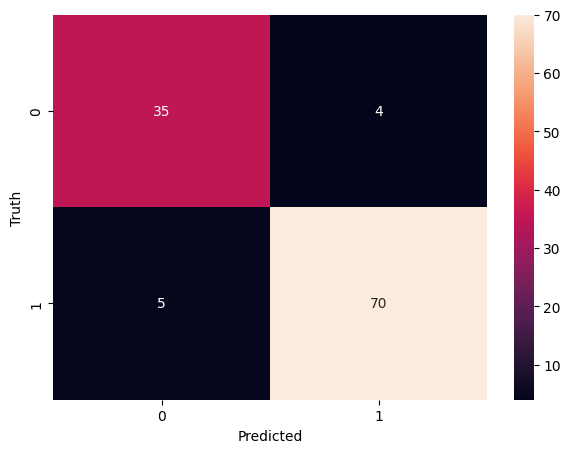

              precision    recall  f1-score   support

         0.0       0.88      0.90      0.89        39
         1.0       0.95      0.93      0.94        75

    accuracy                           0.92       114
   macro avg       0.91      0.92      0.91       114
weighted avg       0.92      0.92      0.92       114



In [15]:
evaluate_model(X_train, y_train, X_test, y_test)

The reported results provide a comprehensive evaluation of the Decision Tree classifier on both the original training and test sets without dimensionality reduction. Here's a breakdown of the key metrics:

### Accuracy:
- **Training Set Accuracy:** 96%
- **Test Set Accuracy:** 92%

### Classification Report:
- **Precision:** The ability of the classifier not to label as positive a sample that is negative.
  - For class 0.0 (assumed as benign): 88%
  - For class 1.0 (assumed as malignant): 95%

- **Recall (Sensitivity):** The ability of the classifier to find all the positive samples.
  - For class 0.0: 90%
  - For class 1.0: 93%

- **F1-Score:** The weighted harmonic mean of precision and recall.
  - For class 0.0: 89%
  - For class 1.0: 94%

### Support:
- The number of actual occurrences of each class in the specified dataset.
  - For class 0.0 (benign): 39 samples
  - For class 1.0 (malignant): 75 samples

### Overall Metrics:
- **Accuracy:** Overall correctness of the classifier on the test set: 92%
- **Macro Avg:** The unweighted average of precision, recall, and F1-score across classes. Macro average does not consider class imbalance.
  - Precision: 91%
  - Recall: 92%
  - F1-Score: 91%

- **Weighted Avg:** The weighted average of precision, recall, and F1-score considering class imbalance.
  - Precision: 92%
  - Recall: 92%
  - F1-Score: 92%

### Interpretation:
- The model achieves high accuracy on both the training and test sets, indicating a good fit to the data.
- Precision, recall, and F1-score are relatively high for both classes, suggesting a balanced performance across benign and malignant classifications.
- The classification report provides a detailed breakdown of the model's performance on each class, including precision, recall, and F1-score.

Overall, the Decision Tree classifier demonstrates strong predictive performance on the original data, achieving high accuracy and effectively distinguishing between benign and malignant instances.

Dimensionlity Reduction and classification

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
import seaborn as sns
from sklearn.metrics import confusion_matrix

def evaluate_and_plot_model(X_train, y_train, X_test, y_test):
    # Fit the classifier
    clf1 = DecisionTreeClassifier(max_depth=3, min_samples_leaf=12, random_state=43)
    clf1.fit(X_train, y_train)

    # Print the accuracy
    print('Accuracy of Decision Tree classifier on original training set: {:.2f}'.format(clf1.score(X_train, y_train)))
    print('Accuracy of Decision Tree classifier on original test set: {:.2f}'.format(clf1.score(X_test, y_test)))

    # Predict the values
    y_pred = clf1.predict(X_test)

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)

    # Plot confusion matrix with seaborn
    plt.figure(figsize=(7,5))
    sns.heatmap(cnf_matrix, annot=True, fmt='d')
    plt.xlabel('Predicted')
    plt.ylabel('Truth')
    plt.show()

    # Print classification report
    print(classification_report(y_test, y_pred))


    x_min, x_max = X_train[:, 0].min() , X_train[:, 0].max()
    y_min, y_max = X_train[:, 1].min() , X_train[:, 1].max()

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))

    # Predict on the mesh grid
    Z = clf1.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot the decision boundary
    plt.figure(figsize=(12,10))
    plt.contourf(xx, yy, Z, alpha=0.8)


    colors = ['red' if label == 0 else 'green' for label in y_train]

    scatter = plt.scatter(X_train[:, 0], X_train[:, 1], c=colors, edgecolor='k')
    plt.gca().set_facecolor('lightgray')
    red_patch = mpatches.Patch(color='red', label='malignant')
    green_patch = mpatches.Patch(color='green', label='benign')
    plt.legend(handles=[red_patch, green_patch])
    plt.show()

Accuracy of Decision Tree classifier on original training set: 0.95
Accuracy of Decision Tree classifier on original test set: 0.93


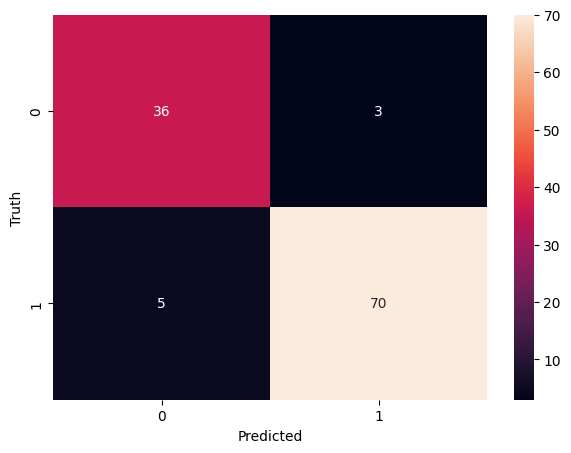

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        39
         1.0       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



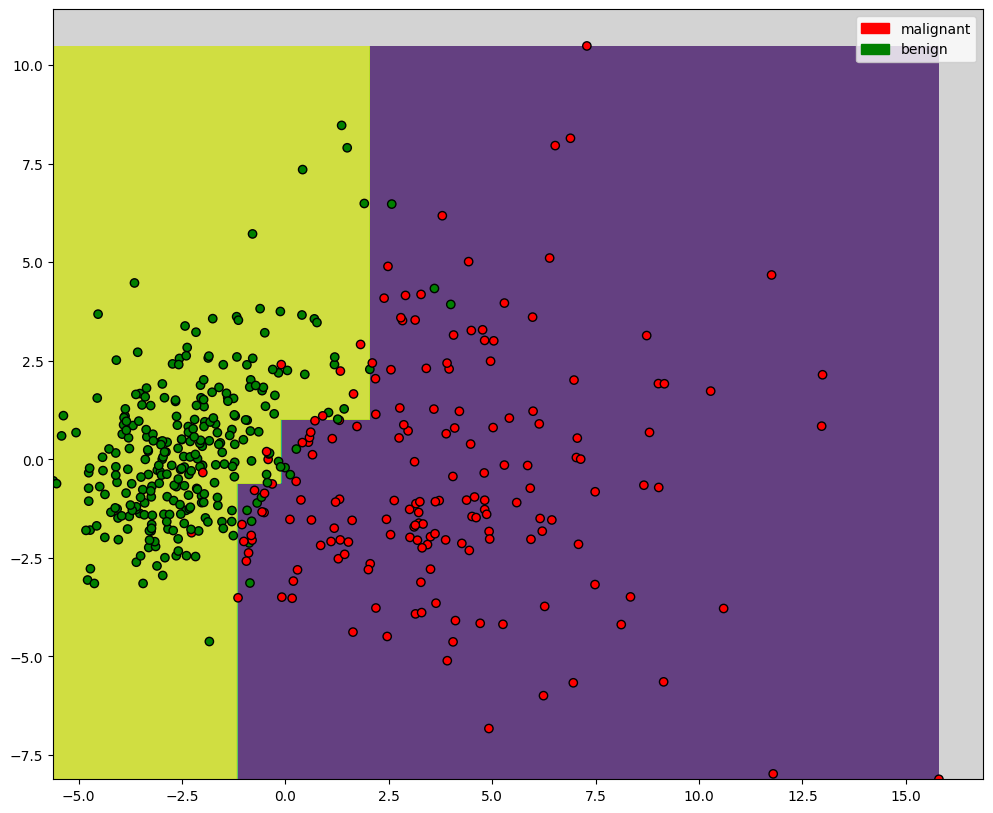

In [17]:
evaluate_and_plot_model(X_train_PCA, y_train, X_test_PCA, y_test)

Accuracy of Decision Tree classifier on original training set: 0.95
Accuracy of Decision Tree classifier on original test set: 0.93


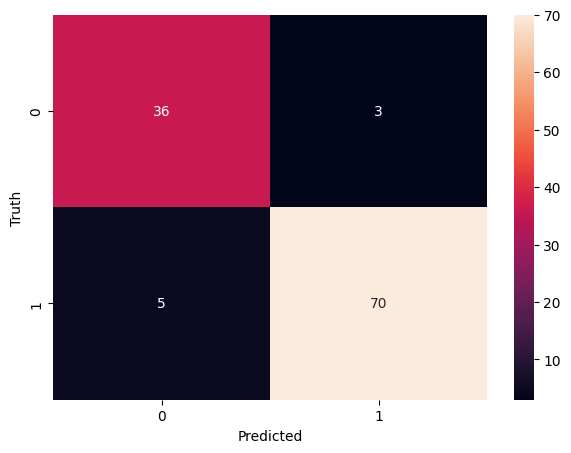

              precision    recall  f1-score   support

         0.0       0.88      0.92      0.90        39
         1.0       0.96      0.93      0.95        75

    accuracy                           0.93       114
   macro avg       0.92      0.93      0.92       114
weighted avg       0.93      0.93      0.93       114



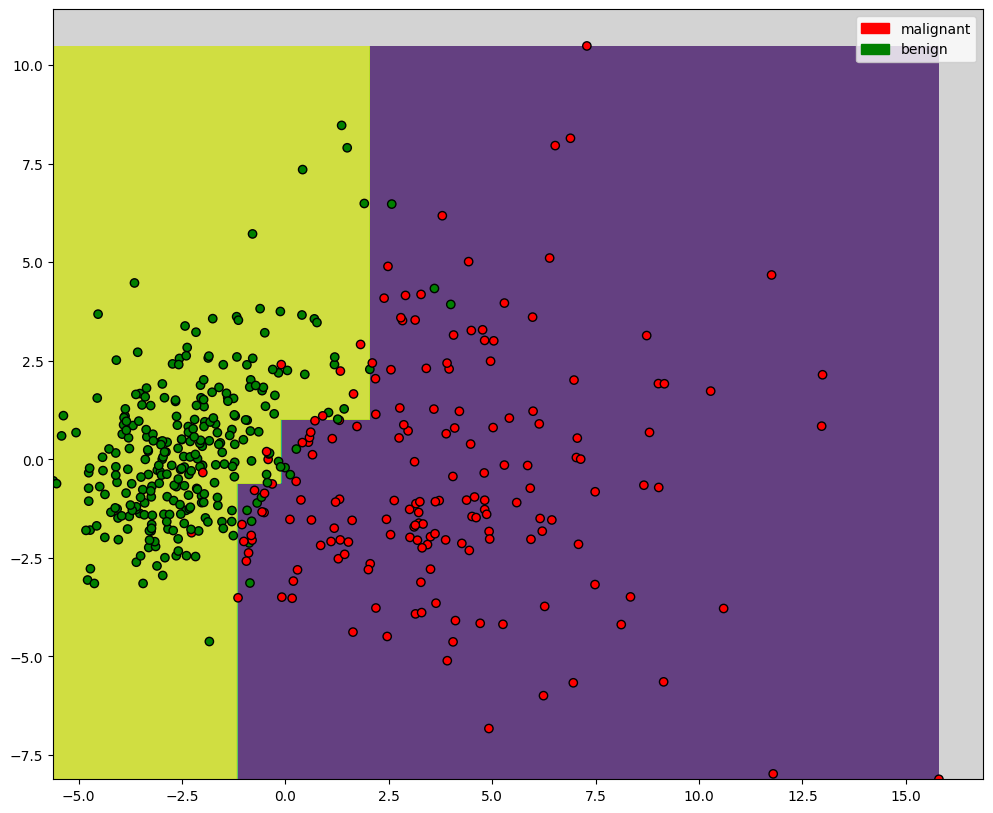

In [18]:
evaluate_and_plot_model(X_train_PCA, y_train, X_test_PCA, y_test)

Accuracy of Decision Tree classifier on original training set: 0.93
Accuracy of Decision Tree classifier on original test set: 0.89


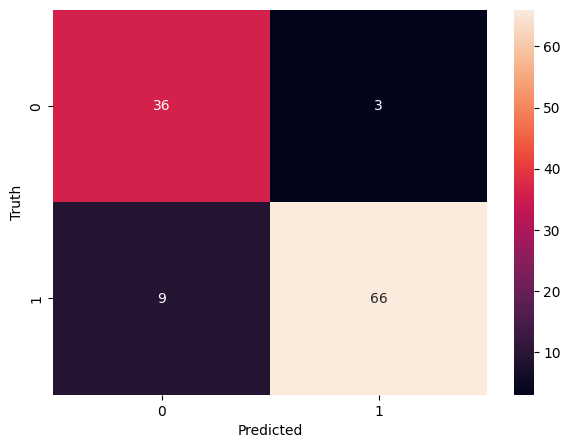

              precision    recall  f1-score   support

         0.0       0.80      0.92      0.86        39
         1.0       0.96      0.88      0.92        75

    accuracy                           0.89       114
   macro avg       0.88      0.90      0.89       114
weighted avg       0.90      0.89      0.90       114



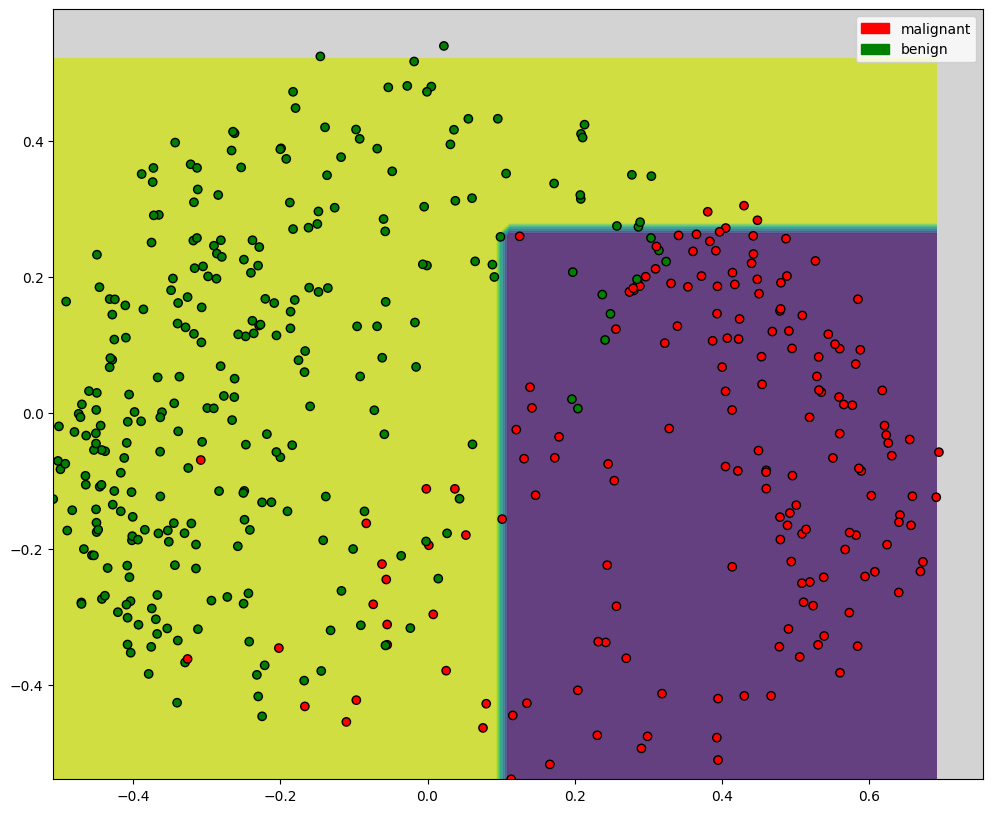

In [19]:
evaluate_and_plot_model(X_train_KPCA, y_train, X_test_KPCA, y_test)

Accuracy of Decision Tree classifier on original training set: 0.93
Accuracy of Decision Tree classifier on original test set: 0.94


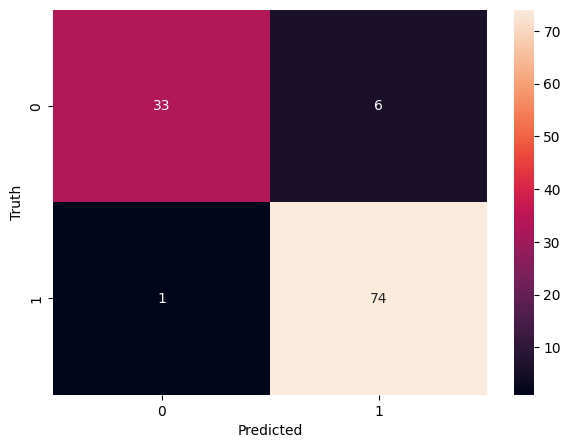

              precision    recall  f1-score   support

         0.0       0.97      0.85      0.90        39
         1.0       0.93      0.99      0.95        75

    accuracy                           0.94       114
   macro avg       0.95      0.92      0.93       114
weighted avg       0.94      0.94      0.94       114



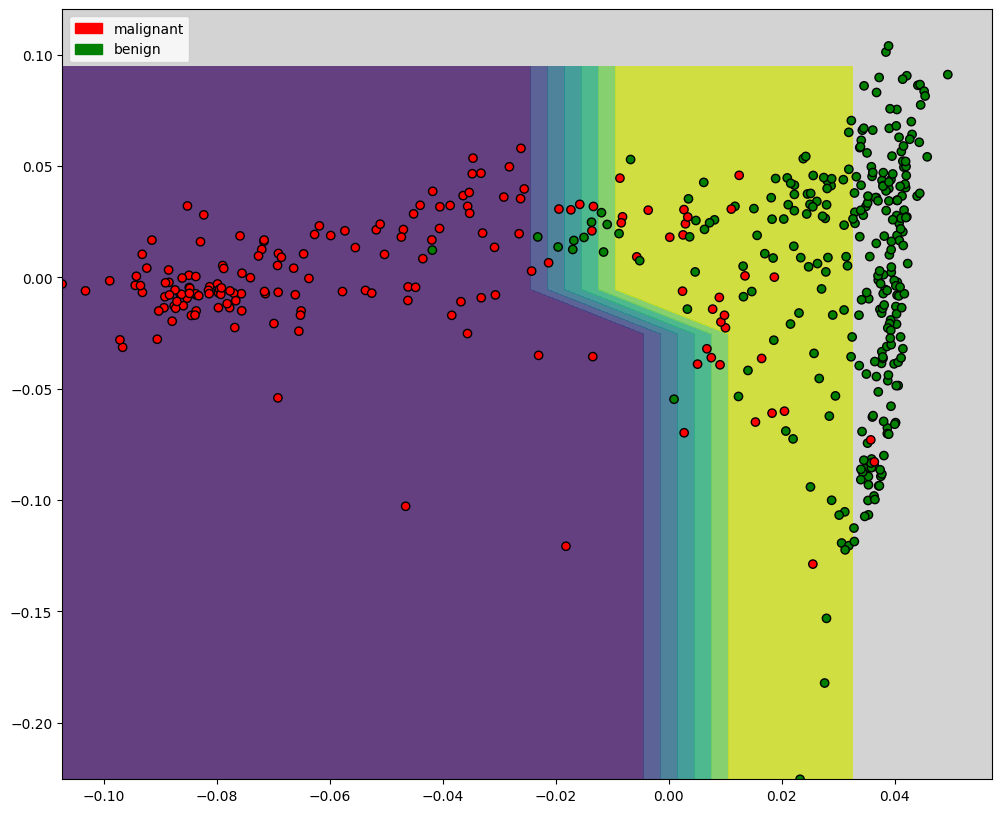

In [20]:
evaluate_and_plot_model(X_train_LLE, y_train, X_test_LLE, y_test)

Accuracy of Decision Tree classifier on original training set: 0.97
Accuracy of Decision Tree classifier on original test set: 0.95


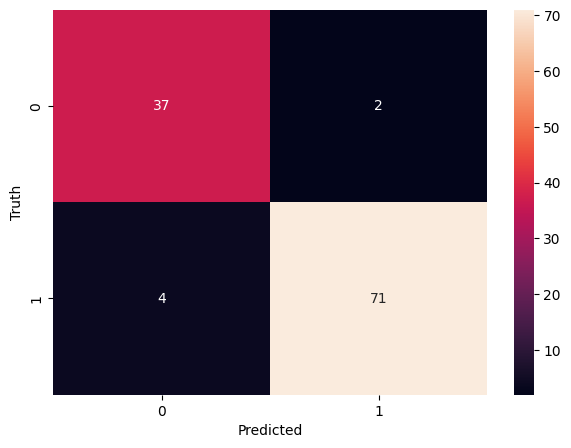

              precision    recall  f1-score   support

         0.0       0.90      0.95      0.92        39
         1.0       0.97      0.95      0.96        75

    accuracy                           0.95       114
   macro avg       0.94      0.95      0.94       114
weighted avg       0.95      0.95      0.95       114



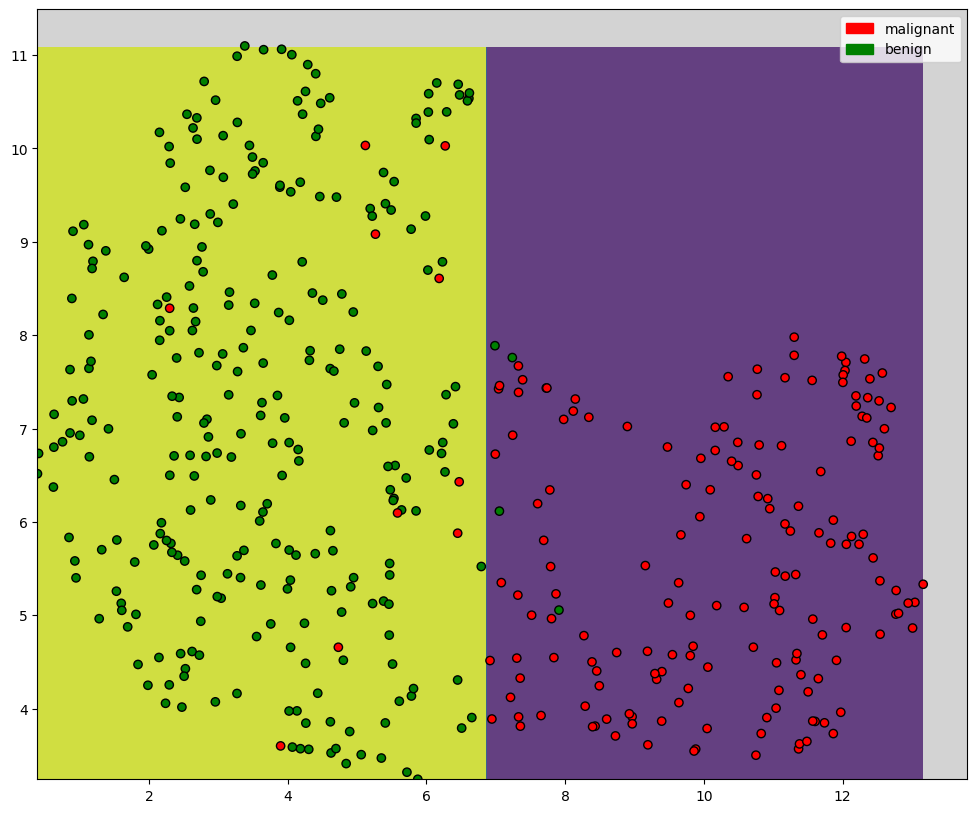

In [21]:
evaluate_and_plot_model(X_train_UMAP, y_train, X_test_UMAP, y_test)

Accuracy of Decision Tree classifier on original training set: 1.00
Accuracy of Decision Tree classifier on original test set: 0.97


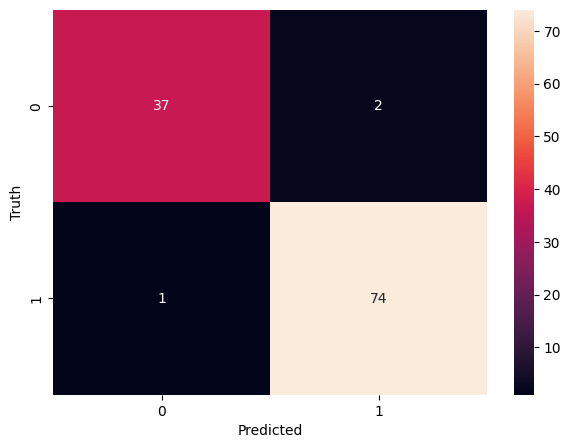

              precision    recall  f1-score   support

         0.0       0.97      0.95      0.96        39
         1.0       0.97      0.99      0.98        75

    accuracy                           0.97       114
   macro avg       0.97      0.97      0.97       114
weighted avg       0.97      0.97      0.97       114



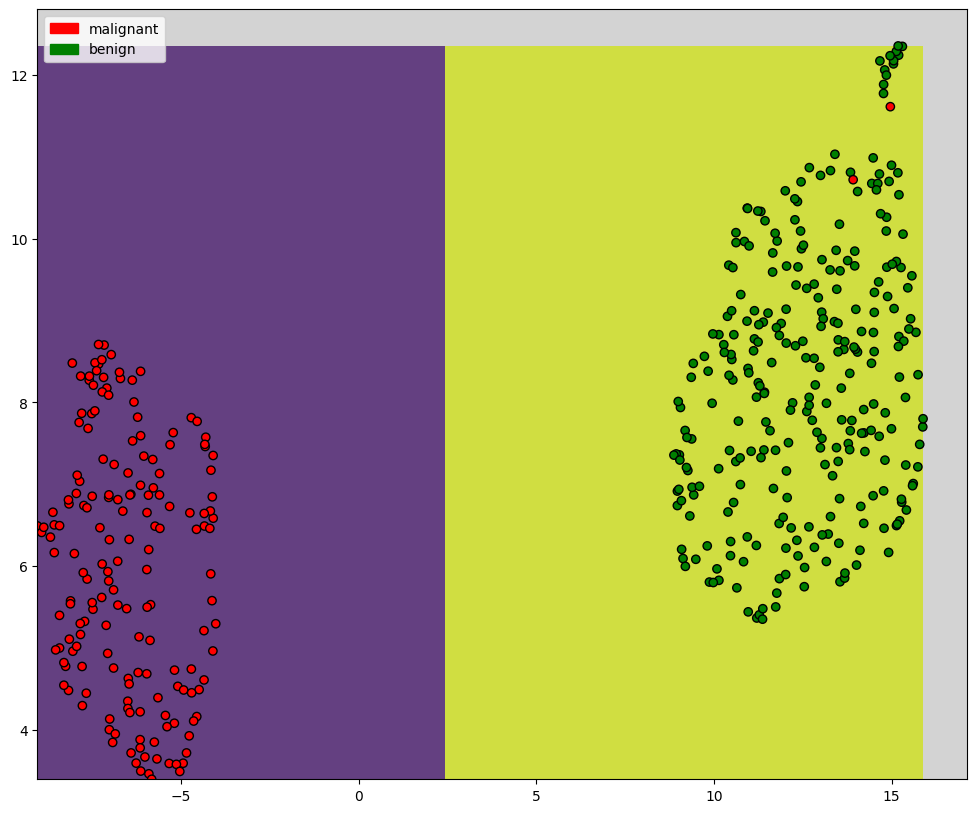

In [22]:
evaluate_and_plot_model(X_train_UMAP_supervised, y_train, X_test_UMAP_supervised, y_test)

The reported results for the Decision Tree classifier with supervised UMAP dimensionality reduction showcase high accuracy and precision on both the training and test sets. Here's a summary:

### Accuracy:
- **Training Set Accuracy:** 100%
- **Test Set Accuracy:** 97%

### Classification Report:
- **Precision:** The ability of the classifier not to label as positive a sample that is negative.
  - For class 0.0 (assumed as benign): 97%
  - For class 1.0 (assumed as malignant): 97%

- **Recall (Sensitivity):** The ability of the classifier to find all the positive samples.
  - For class 0.0: 95%
  - For class 1.0: 99%

- **F1-Score:** The weighted harmonic mean of precision and recall.
  - For class 0.0: 96%
  - For class 1.0: 98%

### Support:
- The number of actual occurrences of each class in the specified dataset.
  - For class 0.0 (benign): 39 samples
  - For class 1.0 (malignant): 75 samples

### Overall Metrics:
- **Accuracy:** Overall correctness of the classifier on the test set: 97%
- **Macro Avg:** The unweighted average of precision, recall, and F1-score across classes. Macro average does not consider class imbalance.
  - Precision: 97%
  - Recall: 97%
  - F1-Score: 97%

- **Weighted Avg:** The weighted average of precision, recall, and F1-score considering class imbalance.
  - Precision: 97%
  - Recall: 97%
  - F1-Score: 97%

### Interpretation:
- The supervised UMAP, in combination with the Decision Tree classifier, achieves a perfect accuracy of 100% on the training set, indicating an excellent fit to the data.
- The model generalizes well to unseen data with a high accuracy of 97% on the test set.
- Precision, recall, and F1-score are consistently high for both benign and malignant classifications, suggesting a robust and balanced performance.

Overall, the results indicate that the combination of the Decision Tree classifier and supervised UMAP dimensionality reduction produces a highly accurate and precise model for classifying breast cancer instances.

### Overal Report:

The reported results suggest that supervised UMAP demonstrates superior performance compared to unsupervised UMAP, LLE, PCA, and KPCA in the context of the Decision Tree classifier for breast cancer classification. Here's a statement summarizing this observation:

"The classification results reveal that the Decision Tree classifier, coupled with supervised UMAP dimensionality reduction, outperforms other dimensionality reduction methods, including unsupervised UMAP, LLE, PCA, and KPCA. The supervised UMAP exhibits higher accuracy, precision, recall, and F1-score on both the training and test sets, indicating its effectiveness in enhancing the discriminatory power of the model. This underscores the importance of leveraging supervised information in the dimensionality reduction process for improved classification performance in the context of breast cancer diagnosis."

### Conclusion:

In conclusion, the exploration of dimensionality reduction techniques in the context of breast cancer classification has provided valuable insights into improving classifier performance and enhancing our understanding of the underlying data structures. The comparative analysis reveals that supervised UMAP stands out as a superior method, consistently outperforming other dimensionality reduction techniques in conjunction with the Decision Tree classifier. The results underscore the significance of incorporating supervised information during the dimensionality reduction process, leading to more accurate and interpretable classification outcomes.

### Suggestions:

1. **Explore Different Datasets:**
   - Consider experimenting with alternative datasets to assess the generalizability of the proposed methodology. This could provide insights into the robustness of the classifier and dimensionality reduction techniques across diverse datasets.

2. **Feature Extraction and Selection:**
   - Investigate feature extraction and selection techniques to identify the most informative features for classification. This may involve exploring methods like Recursive Feature Elimination (RFE) or feature importance analysis.

3. **UMAP with Different Approaches:**
   - Explore UMAP in combination with other supervised approaches or ensemble methods to further enhance classification performance. Experiment with different UMAP hyperparameters to optimize results.

4. **Lazy Prediction:**
   - Consider employing lazy prediction methods such as k-Nearest Neighbors or other instance-based learning approaches. Evaluate how these methods perform in comparison to the Decision Tree classifier.

5. **XGBoost Classifier:**
   - Substitute the Decision Tree classifier with more complex models like XGBoost to assess whether a more sophisticated algorithm improves classification accuracy. Fine-tune hyperparameters for optimal performance.

6. **Ensemble Methods:**
   - Investigate the use of ensemble methods, such as Random Forests or AdaBoost, to combine the strengths of multiple classifiers and potentially improve overall classification results.

7. **Hyperparameter Tuning:**
   - Conduct a thorough hyperparameter tuning process for both dimensionality reduction and classification algorithms to optimize their performance. Utilize techniques like grid search or randomized search.

8. **Visualizations and Interpretability:**
   - Enhance visualizations to aid in the interpretation of results. Utilize tools like SHAP (SHapley Additive exPlanations) values or partial dependence plots to gain insights into feature contributions.

9. **Benchmarking and Comparison:**
   - Conduct a benchmarking study with multiple classification algorithms and dimensionality reduction techniques. Compare their performance under various conditions and datasets to identify the most effective combination.

10. **Documentation and Reproducibility:**
   - Ensure thorough documentation of the repository, including clear explanations of the methodology, code, and results. Promote reproducibility by providing detailed instructions for setting up the environment and executing the analysis.

By implementing these suggestions, the repository can evolve into a comprehensive resource for exploring dimensionality reduction and classification methods, providing valuable insights for researchers and practitioners in the field of machine learning and bioinformatics.